In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

###MODELS 

from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [14]:
df = pd.read_csv("data.csv")
pd.set_option('display.max_columns', None)

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [18]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

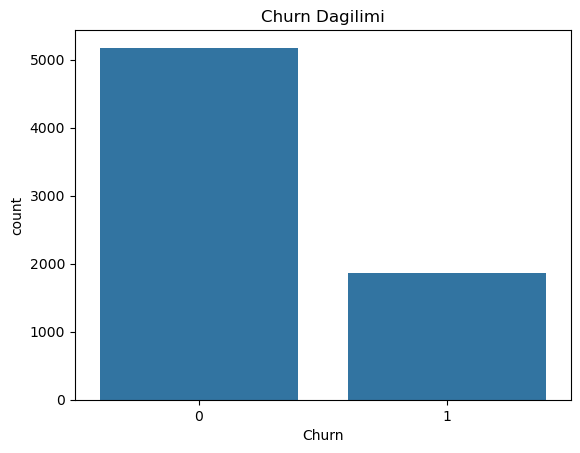

In [20]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Dagilimi")
plt.show()

In [21]:
churn_rate = df['Churn'].value_counts(normalize=True)
print("Churn oranı:\n", churn_rate)

Churn oranı:
 Churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [22]:
df["TotalCharges"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
print(f'firstly there is {df["TotalCharges"].isnull().sum()} NaN values in TotalCharges')
df["TotalCharges"].replace(" ", np.nan, inplace=True)
print(f'after converting space values into NaN, there is {df["TotalCharges"].isnull().sum()} NaN values in TotalCharges')
df['TotalCharges'].fillna(0, inplace=True)
print(f'secondly there is {df["TotalCharges"].isnull().sum()} NaN values in TotalCharges')
print(f'firstly data type is {df["TotalCharges"].dtype}')
# We converted TotalCharges from object to Float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
print(f'secondly data type is {df["TotalCharges"].dtype}')
# there were 11 rows. Their TotalCharges values were NaN. They seems just new 
# customers. Because tenure was 0. So we thought they didnt pay any bill yet 
# and set their TotalCharges value as 0. 

firstly there is 0 NaN values in TotalCharges
after converting space values as NaN there is 11 NaN values in TotalCharges
secondly there is 0 NaN values in TotalCharges
firstly data type is object
secondly data type is float64


In [24]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [25]:
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols = categorical_cols.drop('customerID')
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [26]:
for col in df.columns:
    print(f"column name: {col} ////// column type: {df[col].dtype}")

column name: customerID ////// column type: object
column name: gender ////// column type: object
column name: SeniorCitizen ////// column type: int64
column name: Partner ////// column type: object
column name: Dependents ////// column type: object
column name: tenure ////// column type: int64
column name: PhoneService ////// column type: object
column name: MultipleLines ////// column type: object
column name: InternetService ////// column type: object
column name: OnlineSecurity ////// column type: object
column name: OnlineBackup ////// column type: object
column name: DeviceProtection ////// column type: object
column name: TechSupport ////// column type: object
column name: StreamingTV ////// column type: object
column name: StreamingMovies ////// column type: object
column name: Contract ////// column type: object
column name: PaperlessBilling ////// column type: object
column name: PaymentMethod ////// column type: object
column name: MonthlyCharges ////// column type: float64


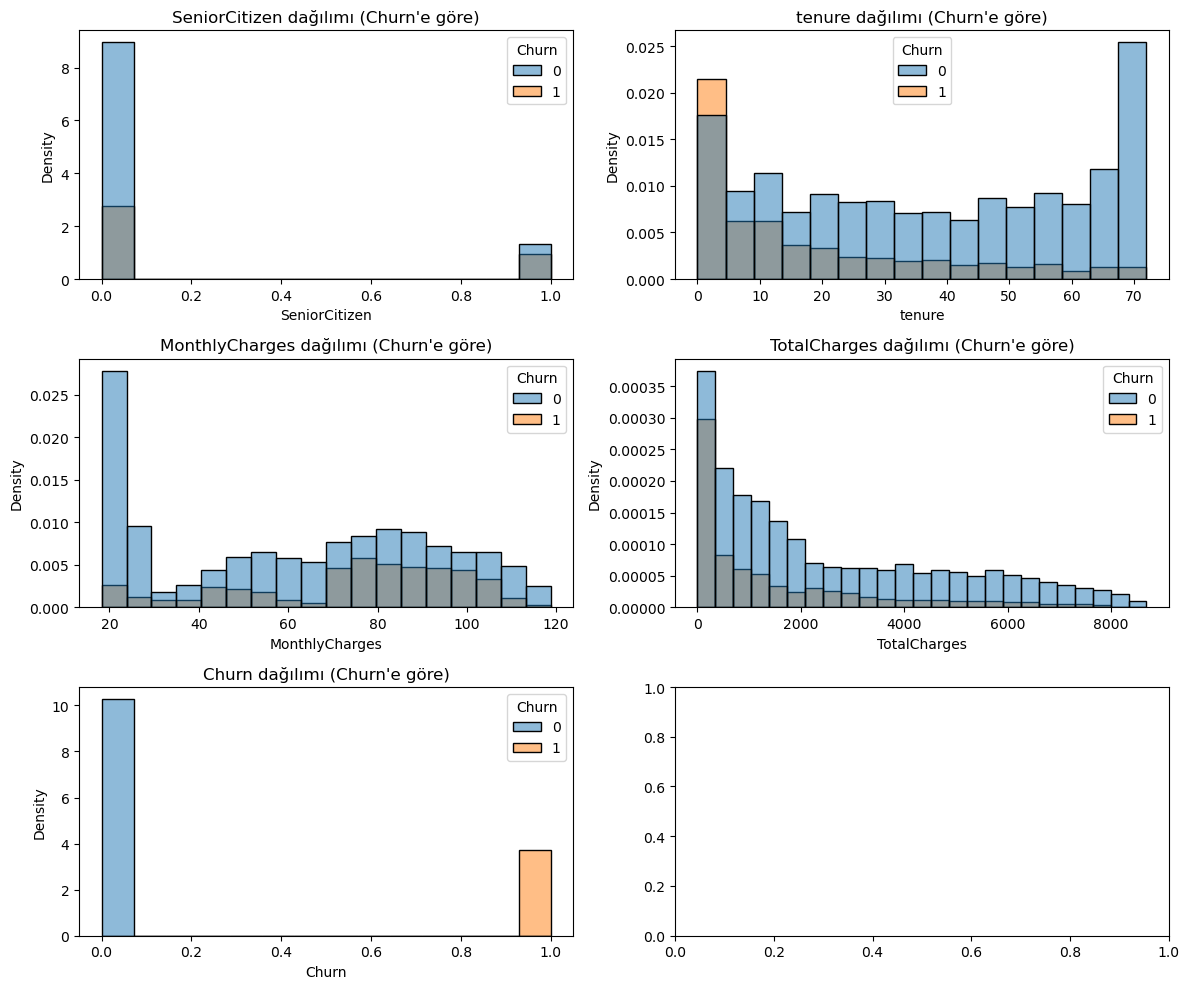

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df,
        x=col,
        hue='Churn',
        kde=False,
        stat='density',
        ax=axes[i]
    )
    axes[i].set_title(f"{col} dağılımı (Churn'e göre)")

plt.tight_layout()
plt.show()

In [28]:
categorical_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

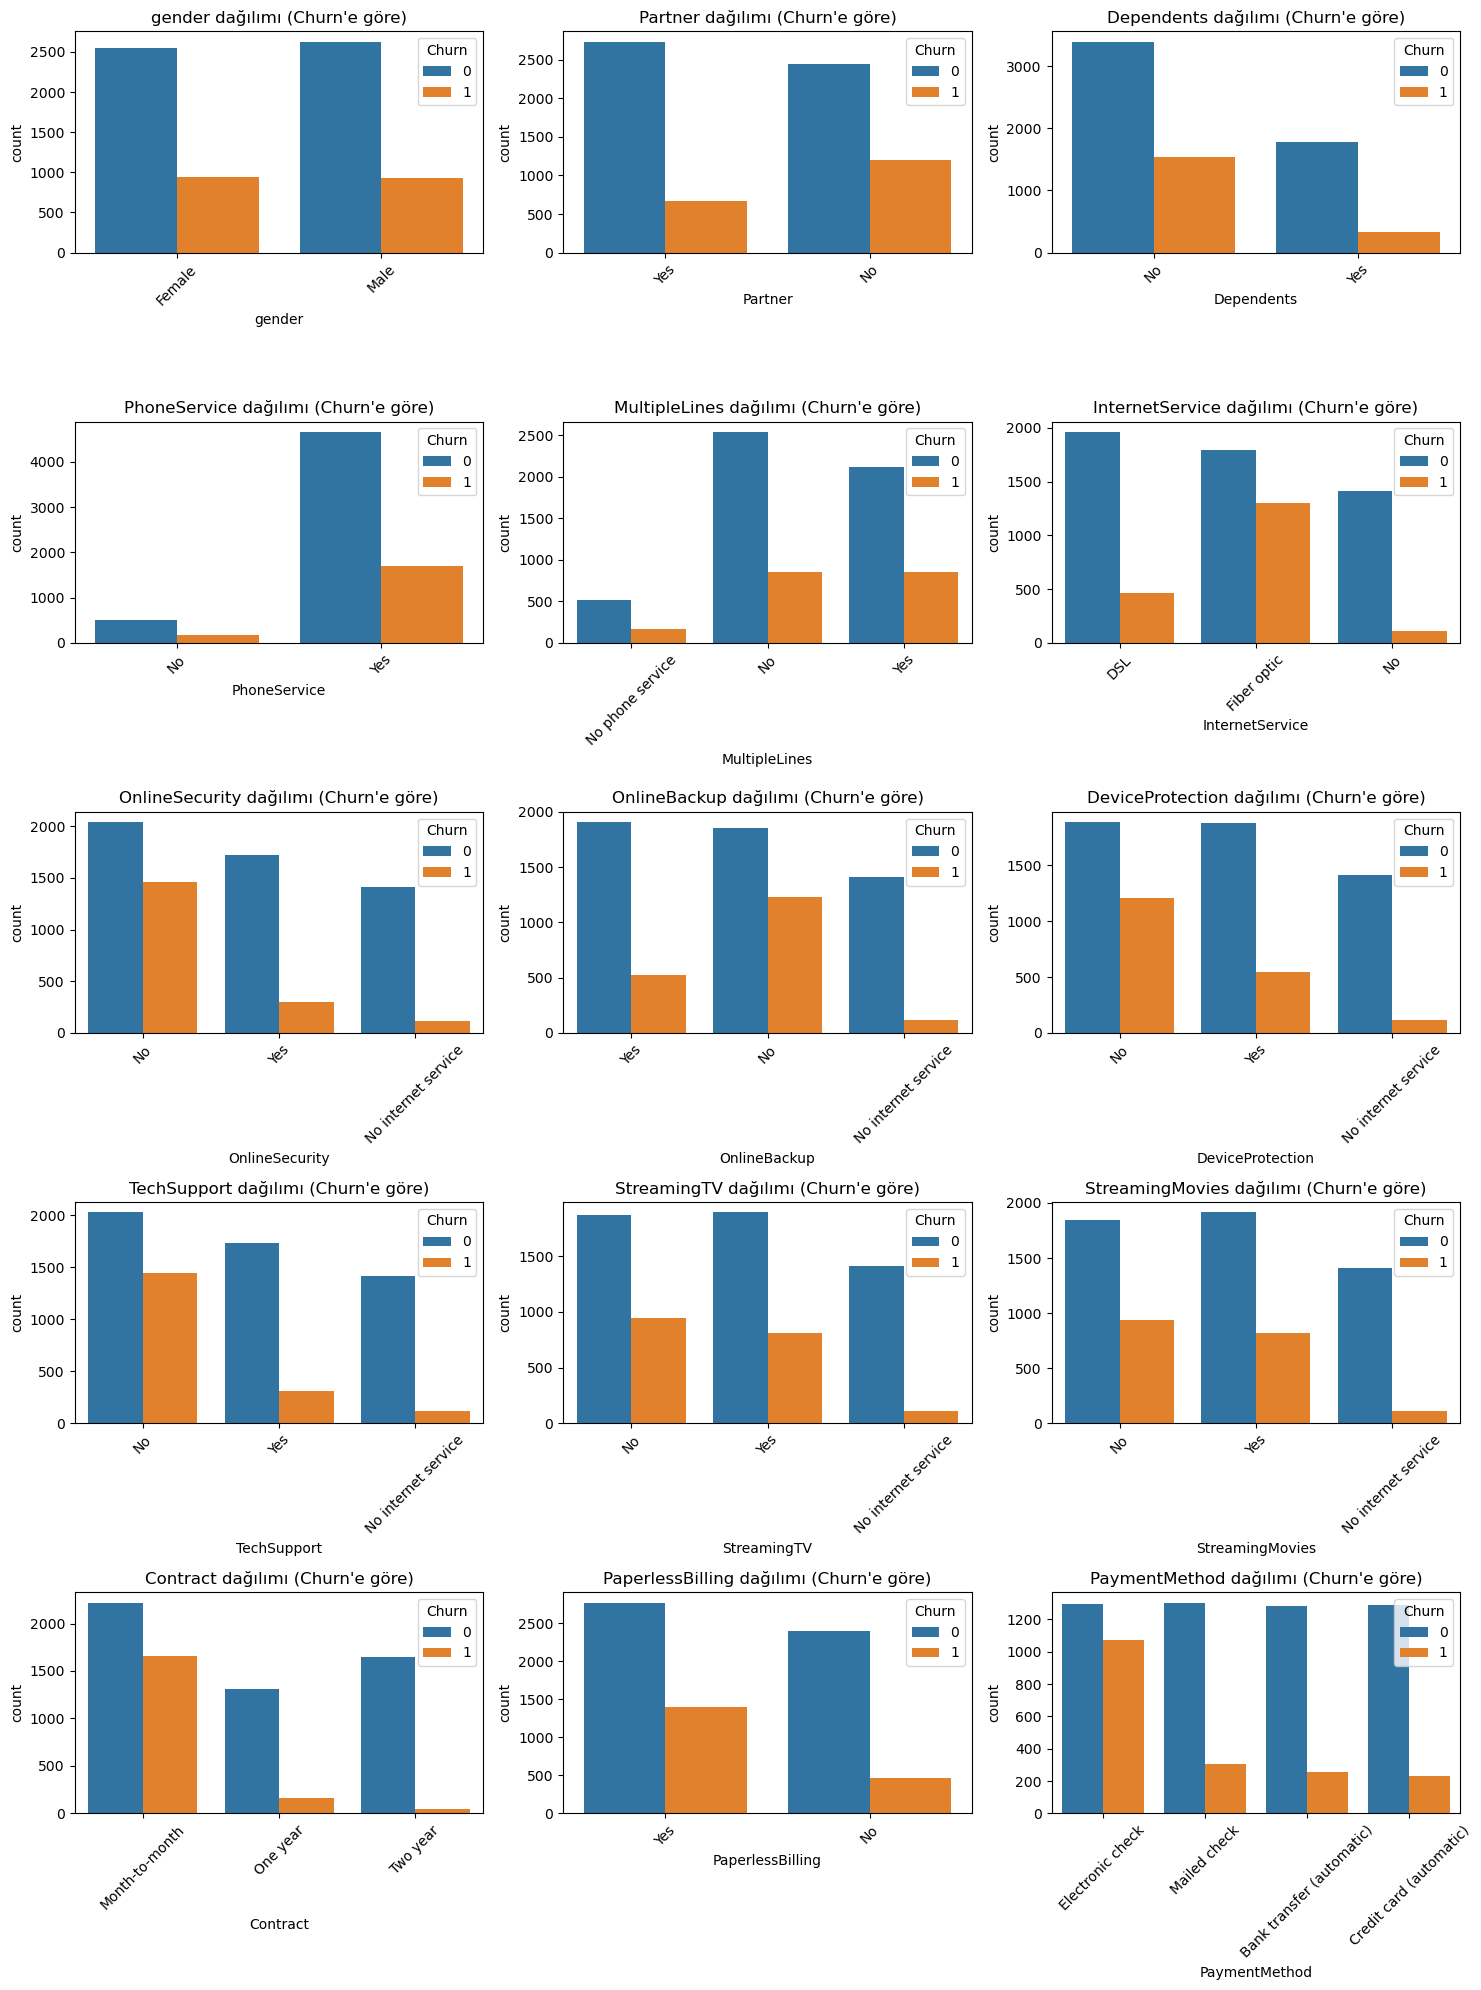

In [29]:
import math
n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Ekseni düzleştir (bazı gridler boş kalabilir)
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f"{col} dağılımı (Churn'e göre)")
    axes[i].tick_params(axis='x', rotation=45)

# Eğer bazı eksenler boş kaldıysa, onları kapatalım
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


In [30]:
############## LABEL ENCODING ##############

In [37]:
df[["gender"]]

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7038,Male
7039,Female
7040,Female
7041,Male


In [32]:
print(f'there is {df.shape[0]} rows in df')
print(df["gender"].value_counts())
print("so it seems gender feature doesnt have any empty space row like TotalCharge") 

there is 7043 rows in df
gender
Male      3555
Female    3488
Name: count, dtype: int64
so it seems gender feature doesnt have any empty space row like TotalCharge


In [33]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
print(df["gender"].value_counts())
print("we did label encoder; male is 1 and female is 0")

gender
1    3555
0    3488
Name: count, dtype: int64
we did label encoder; male is 1 and female is 0


MODELLING

In [35]:
df["Partner"] = le.fit_transform(df["Partner"])
print(df["gender"].value_counts())
print("we did label encoder; YES is 1 and NO is 0")

gender
1    3555
0    3488
Name: count, dtype: int64
we did label encoder; YES is 1 and NO is 0


In [40]:
df["Dependents"] = le.fit_transform(df["Dependents"])
print(df["Dependents"].value_counts())
print("we did label encoder; YES is 1 and NO is 0")

Dependents
0    4933
1    2110
Name: count, dtype: int64
we did label encoder; YES is 1 and NO is 0


In [42]:
df["PhoneService"] = le.fit_transform(df["PhoneService"])
print(df["PhoneService"].value_counts())
print("we did label encoder; YES is 1 and NO is 0")

PhoneService
1    6361
0     682
Name: count, dtype: int64
we did label encoder; YES is 1 and NO is 0


In [55]:
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
print(le.classes_)
print("[No , No Phone Service, Yes]")

[0 1 2]
[No , No Phone Service, Yes]


In [80]:
print(df["InternetService"].value_counts())
df['InternetService'] = le.fit_transform(df['InternetService'])
print(le.classes_)

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
['DSL' 'Fiber optic' 'No']


In [59]:
print(df["OnlineSecurity"].value_counts())
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
print("[No , No Internet Service, Yes]")

OnlineSecurity
0    3498
2    2019
1    1526
Name: count, dtype: int64
[No , No Internet Service, Yes]


In [60]:
print(df["OnlineBackup"].value_counts())
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
print(le.classes_)

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
['No' 'No internet service' 'Yes']


In [61]:
print(df["DeviceProtection"].value_counts())
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
print(le.classes_)

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
['No' 'No internet service' 'Yes']


In [62]:
print(df["TechSupport"].value_counts())
df['TechSupport'] = le.fit_transform(df['TechSupport'])
print(le.classes_)

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
['No' 'No internet service' 'Yes']


In [64]:
print(df["StreamingTV"].value_counts())
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
print(le.classes_)

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
['No' 'No internet service' 'Yes']


In [65]:
print(df["StreamingMovies"].value_counts())
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
print(le.classes_)

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
['No' 'No internet service' 'Yes']


In [67]:
print(df["Contract"].value_counts())
df['Contract'] = le.fit_transform(df['Contract'])
print(le.classes_)

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
['Month-to-month' 'One year' 'Two year']


In [70]:
print(df["PaperlessBilling"].value_counts())
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
print(le.classes_)

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64
['No' 'Yes']


In [73]:
print(df["PaymentMethod"].value_counts())
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
print(le.classes_)

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [85]:
############## SPLIT ##############

In [81]:
X = df.drop(['Churn', "customerID"], axis=1)
y = df['Churn']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [83]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [86]:
############## MODELLING ##############

In [84]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.63      0.58      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_pred))

Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.51      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, dt_pred))

Decision Tree:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81      1035
           1       0.49      0.52      0.50       374

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [98]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.2 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 4.4 MB/s eta 0:00:0000:0100:02m


In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, xgb_pred))

/opt/conda/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [12:00:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86      1035
           1       0.61      0.51      0.56       374

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [101]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 3.7 MB/s eta 0:00:0000:0100:01


In [ ]:
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
lgb_pred = lgb_model.predict(X_test)
print("LightGBM:\n", classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
LightGBM:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



FOR GIT DOCUMENTATION
Preprocessing : Label encoding is finished 
TASKS:
-check is there nan values in features.
-make label encodings in loop. code it cleaner. 
-install xgboost and lightgbm to the image

NEXT SESSION: label encode partner and other features. make modelling